In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

df = pd.read_csv('data/processed/dataset.csv')


In [57]:
df = df.drop(columns=['Date'])
target = 'Revenue_(USD)'
X = df.drop(columns=[target])
y = df[target]

### 1. Phân tích các tham số thống kê của dữ liệu

In [58]:
print("Kích thước dữ liệu:", df.shape)
print("\n🔹 Thông tin dữ liệu:")
print(df.info())


Kích thước dữ liệu: (1132, 15)

🔹 Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Average_views_per_viewer  1132 non-null   float64
 1   Unique_viewers            1132 non-null   float64
 2   Click_rate_(%)            1132 non-null   float64
 3   Impressions               1132 non-null   float64
 4   Comments                  1132 non-null   float64
 5   Shares                    1132 non-null   float64
 6   Dislikes                  1132 non-null   float64
 7   Likes                     1132 non-null   float64
 8   Average_viewed_(%)        1132 non-null   float64
 9   Videos_published          1132 non-null   float64
 10  Views                     1132 non-null   float64
 11  Watch_hours               1132 non-null   float64
 12  Average_view_sec          1132 non-null   float64
 13  Revenue_(U

In [59]:
# ===================================
# Thống kê mô tả cơ bản
# ===================================
print("🔹 Thống kê mô tả từng cột:")
display(df.describe().T.round(5))

🔹 Thống kê mô tả từng cột:


,count,mean,std,min,25%,50%,75%,max
Average_views_per_viewer,1132.0,1.62723,3.258400e-01,1.0000,1.42695,1.55675,1.79115,2.615800e+00
Unique_viewers,1132.0,25396.72615,5.491041e+04,8.0000,457.50000,4115.00000,18102.50000,4.822540e+05
Click_rate_(%),1132.0,6.56864,2.246660e+00,3.5200,5.16750,6.11000,7.12250,2.314000e+01
Impressions,1132.0,833559.09452,1.878691e+06,44.0000,8469.00000,68862.00000,398580.75000,1.632350e+07
Comments,1132.0,224.11926,7.370135e+02,0.0000,2.00000,28.00000,128.25000,1.158200e+04
Shares,1132.0,123.03622,3.339799e+02,0.0000,2.00000,22.00000,87.00000,6.513000e+03
Dislikes,1132.0,39.39488,8.149386e+01,0.0000,0.75000,6.00000,31.00000,6.640000e+02
Likes,1132.0,2788.84011,7.468639e+03,0.0000,15.00000,257.50000,1246.25000,6.354300e+04
Average_viewed_(%),1132.0,28.77736,6.136640e+00,10.9500,24.22750,28.09500,32.55000,6.219000e+01
Videos_published,1132.0,0.15106,4.598500e-01,0.0000,0.00000,0.00000,0.00000,4.000000e+00


In [60]:
# ===================================
# Phân tích độ lệch (skew) và độ nhọn (kurtosis)
# ===================================
print("\n🔹 Phân tích độ lệch và độ nhọn:")
stats_df = pd.DataFrame({
    'Mean': df.mean(),
    'Std': df.std(),
    'Skewness': df.skew(),
    'Kurtosis': df.kurt()
}).round(3)
display(stats_df)


🔹 Phân tích độ lệch và độ nhọn:


,Mean,Std,Skewness,Kurtosis
Average_views_per_viewer,1.627,0.326,0.783,0.427
Unique_viewers,25396.726,54910.406,3.740,17.174
Click_rate_(%),6.569,2.247,2.342,8.981
Impressions,833559.095,1878690.903,3.197,12.204
Comments,224.119,737.014,7.827,81.921
Shares,123.036,333.980,8.726,130.222
Dislikes,39.395,81.494,3.346,13.745
Likes,2788.840,7468.639,4.880,28.681
Average_viewed_(%),28.777,6.137,0.816,1.581
Videos_published,0.151,0.460,3.978,20.443


<Figure size 1200x800 with 0 Axes>

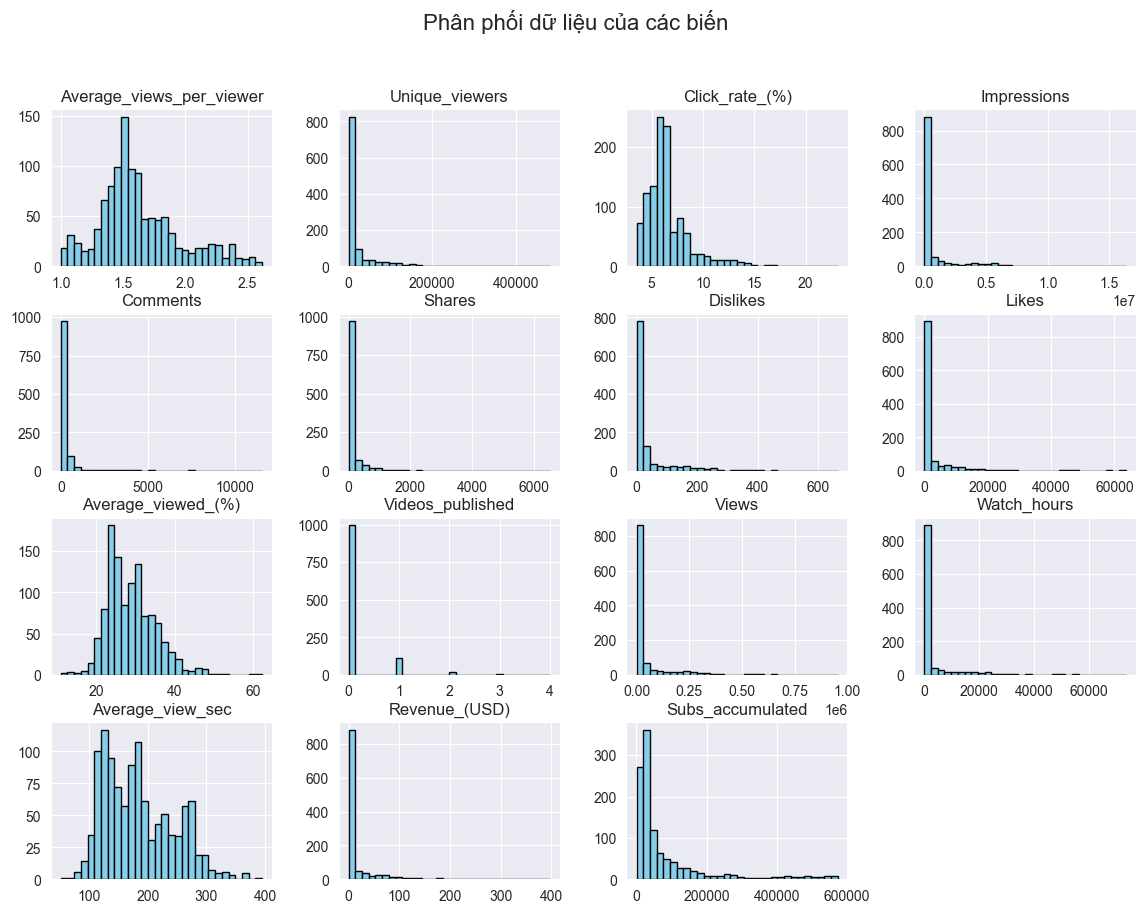

In [61]:
# ===================================
# Trực quan hóa phân phối từng cột
# ===================================
plt.figure(figsize=(12,8))
df.hist(bins=30, figsize=(14,10), color='skyblue', edgecolor='black')
plt.suptitle("Phân phối dữ liệu của các biến", fontsize=16)
plt.show()

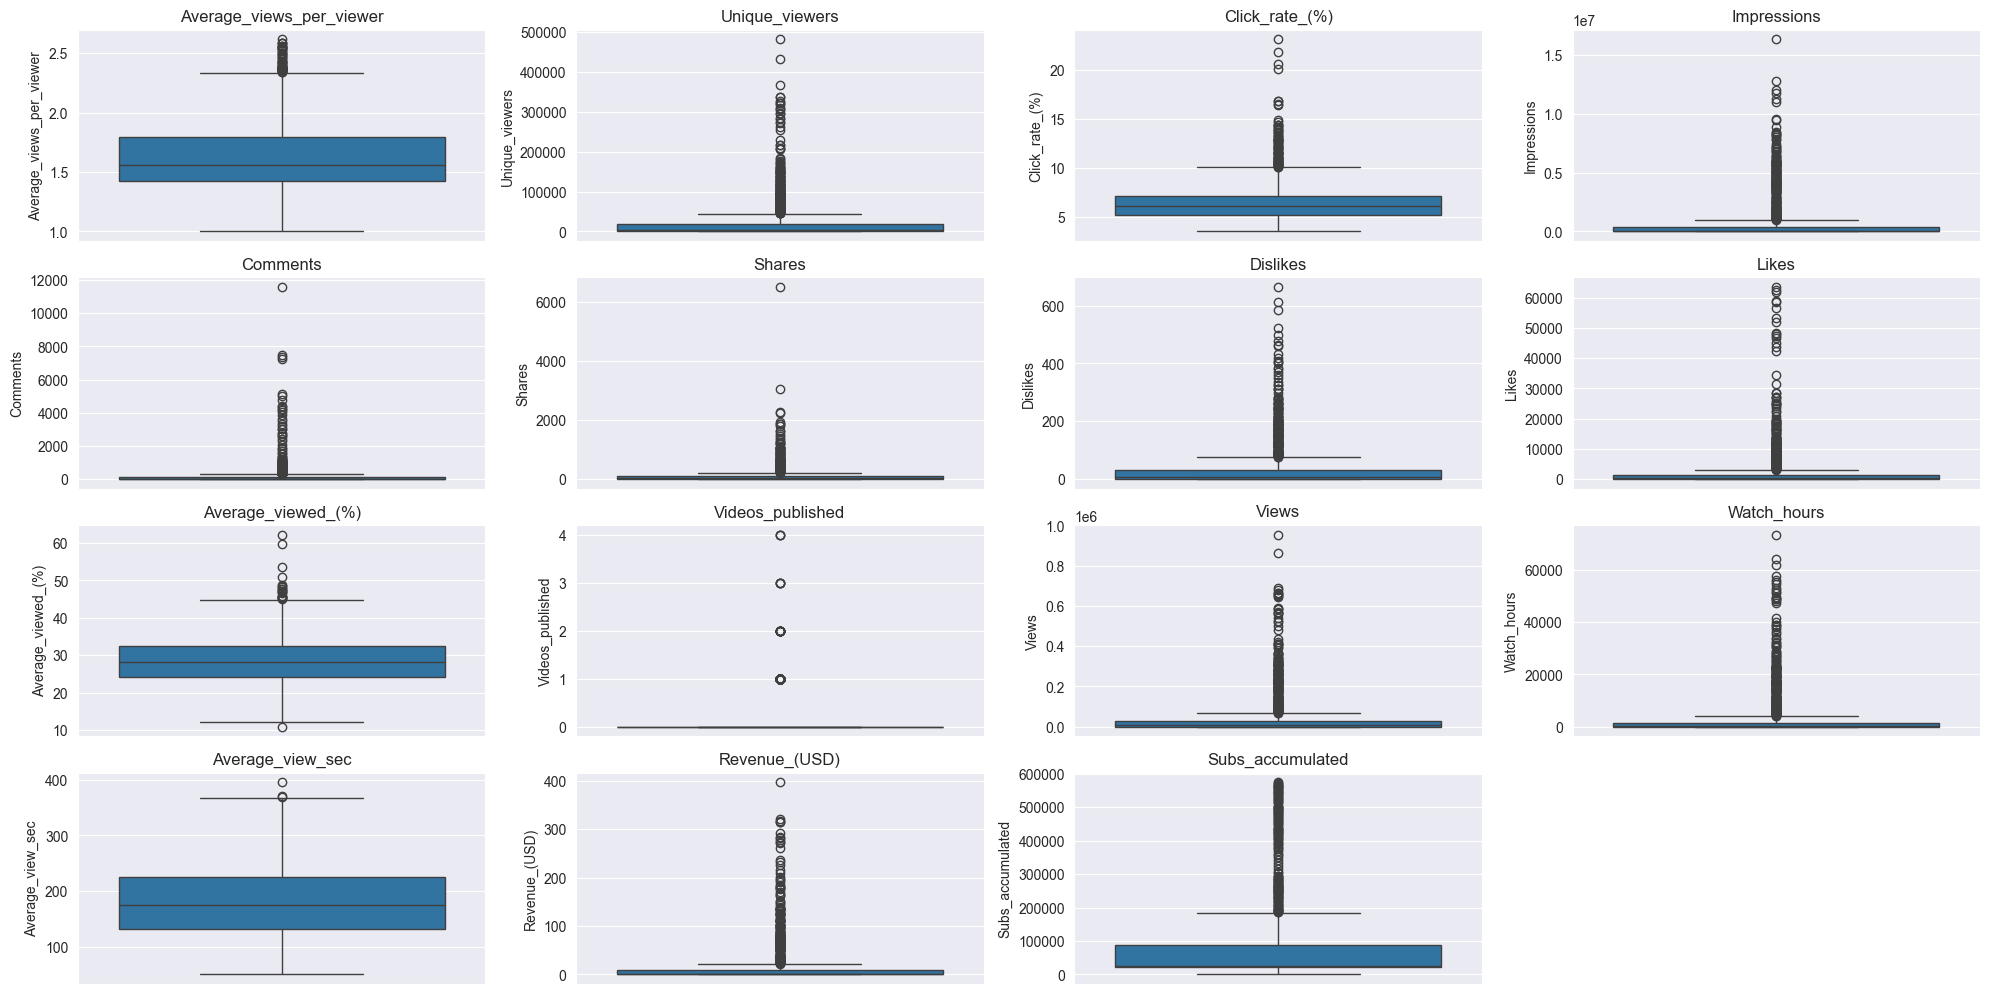

In [62]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Vẽ biểu đồ hộp cho các cột số để trực quan hóa các giá trị ngoại lai
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(6, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

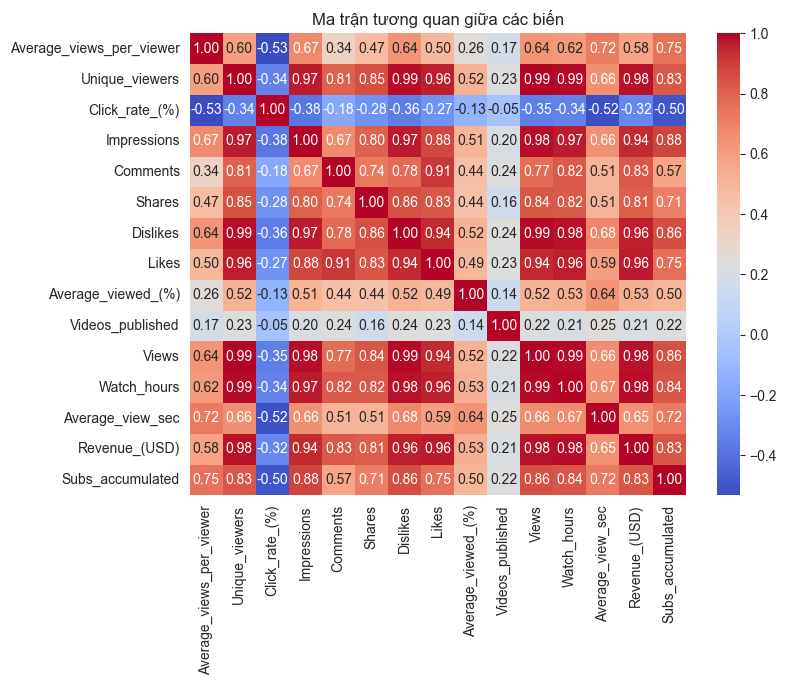

In [63]:
# ===================================
# Ma trận tương quan
# ===================================
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Ma trận tương quan giữa các biến")
plt.show()

### 2. Chuẩn hóa dữ liệu và đánh giá các thành phần chính (của dữ liệu gốc hoặc sau khi phân thích thành phần chính) theo các tham số thống kê.

### 2.1. Với dữ liệu gốc

In [64]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\n Sau chuẩn hóa:")
display(X_scaled_df.describe().T.round(5))


 Sau chuẩn hóa:


,count,mean,std,min,25%,50%,75%,max
Average_views_per_viewer,1132.0,-0.0,1.00044,-1.92582,-0.61494,-0.21641,0.50328,3.03524
Unique_viewers,1132.0,0.0,1.00044,-0.46257,-0.45438,-0.38774,-0.13290,8.32373
Click_rate_(%),1132.0,-0.0,1.00044,-1.35757,-0.62393,-0.20423,0.24664,7.37927
Impressions,1132.0,0.0,1.00044,-0.44386,-0.43938,-0.40722,-0.23164,8.24872
Comments,1132.0,0.0,1.00044,-0.30423,-0.30151,-0.26622,-0.13014,15.41749
Shares,1132.0,0.0,1.00044,-0.36856,-0.36257,-0.30266,-0.10795,19.14124
Dislikes,1132.0,-0.0,1.00044,-0.48362,-0.47442,-0.40997,-0.10306,7.66783
Likes,1132.0,0.0,1.00044,-0.37357,-0.37156,-0.33908,-0.20663,8.13816
Average_viewed_(%),1132.0,0.0,1.00044,-2.90635,-0.74175,-0.11124,0.61504,5.44718
Videos_published,1132.0,0.0,1.00044,-0.32864,-0.32864,-0.32864,-0.32864,8.37360


In [65]:
# Phân tích PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Tạo DataFrame PCA
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
display(X_pca_df.describe().T)


,count,mean,std,min,25%,50%,75%,max
PC1,1132.0,1.004301e-16,3.077101,-2.782986,-1.635687,-1.038738,-0.181638,20.918110
PC2,1132.0,-5.021503e-17,1.163981,-2.213214,-0.736078,-0.020811,0.414144,9.327752
PC3,1132.0,1.883064e-17,0.985692,-3.590859,-0.421910,-0.251075,-0.037070,8.123432
PC4,1132.0,-4.393816e-17,0.909194,-4.537392,-0.534310,-0.060907,0.524767,5.656798
PC5,1132.0,1.255376e-17,0.710295,-6.047770,-0.425997,-0.117339,0.267730,4.220040
PC6,1132.0,0.000000e+00,0.582326,-3.633924,-0.304672,0.006365,0.344651,6.289281
PC7,1132.0,0.000000e+00,0.487129,-2.290511,-0.139377,0.007510,0.121825,11.779171
PC8,1132.0,1.098454e-16,0.377044,-3.248736,-0.145064,0.007344,0.119186,3.228774
PC9,1132.0,6.590723e-17,0.339783,-1.686335,-0.187179,-0.035943,0.197078,2.464343
PC10,1132.0,-9.415319e-18,0.164401,-2.398037,-0.030774,0.001344,0.034711,2.227715


#### Xác định lượng thông tin được bảo tồn theo phương sai giải thích (explained variances).

PC1: 67.57% | Tổng tích lũy: 67.57%
PC2: 9.67% | Tổng tích lũy: 77.24%
PC3: 6.93% | Tổng tích lũy: 84.18%
PC4: 5.90% | Tổng tích lũy: 90.07%
PC5: 3.60% | Tổng tích lũy: 93.68%
PC6: 2.42% | Tổng tích lũy: 96.10%
PC7: 1.69% | Tổng tích lũy: 97.79%
PC8: 1.01% | Tổng tích lũy: 98.80%
PC9: 0.82% | Tổng tích lũy: 99.63%
PC10: 0.19% | Tổng tích lũy: 99.82%
PC11: 0.11% | Tổng tích lũy: 99.93%
PC12: 0.04% | Tổng tích lũy: 99.97%
PC13: 0.03% | Tổng tích lũy: 100.00%
PC14: 0.00% | Tổng tích lũy: 100.00%


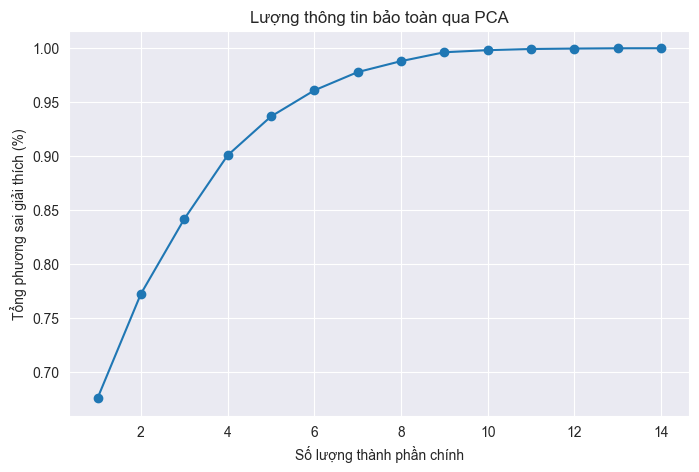

In [66]:
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var_ratio)

for i, var in enumerate(explained_var_ratio):
    print(f"PC{i+1}: {var*100:.2f}% | Tổng tích lũy: {cumulative_var[i]*100:.2f}%")

# Biểu đồ trực quan
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o')
plt.xlabel('Số lượng thành phần chính')
plt.ylabel('Tổng phương sai giải thích (%)')
plt.title('Lượng thông tin bảo toàn qua PCA')
plt.grid(True)
plt.show()

### 2.2. PCA với dữ liệu biến đổi logarit

In [67]:
X_log = np.log1p(X)
scaler_log = StandardScaler()
X_log_scaled = scaler_log.fit_transform(X_log)

X_log_scaled_df = pd.DataFrame(X_log_scaled, columns=X.columns)
print("\n Sau chuẩn hóa:")
display(X_log_scaled_df.describe().T.round(5))


 Sau chuẩn hóa:


,count,mean,std,min,25%,50%,75%,max
Average_views_per_viewer,1132.0,-0.0,1.00044,-2.20621,-0.59789,-0.16481,0.56431,2.71601
Unique_viewers,1132.0,0.0,1.00044,-2.46588,-0.82357,0.09340,0.71227,2.08369
Click_rate_(%),1132.0,-0.0,1.00044,-1.90909,-0.67501,-0.11031,0.41835,4.74357
Impressions,1132.0,0.0,1.00044,-2.65525,-0.73900,0.02769,0.67007,2.02831
Comments,1132.0,0.0,1.00044,-1.42081,-0.93387,0.07168,0.73406,2.72663
Shares,1132.0,-0.0,1.00044,-1.42494,-0.89576,0.08535,0.73168,2.80498
Dislikes,1132.0,0.0,1.00044,-1.16673,-0.88029,-0.09453,0.74289,2.41466
Likes,1132.0,0.0,1.00044,-1.91624,-0.90739,0.10500,0.67765,2.10793
Average_viewed_(%),1132.0,0.0,1.00044,-4.42281,-0.72027,-0.01351,0.69246,3.82964
Videos_published,1132.0,0.0,1.00044,-0.35663,-0.35663,-0.35663,-0.35663,5.69440


In [68]:
# Phân tích PCA
pca_log = PCA()
X_log_pca = pca_log.fit_transform(X_log_scaled)

# Tạo DataFrame PCA
X_log_pca_df = pd.DataFrame(X_log_pca, columns=[f'PC{i+1}' for i in range(X_log_pca.shape[1])])
display(X_log_pca_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
PC1,1132.0,4.017203e-16,3.251325,-7.816177,-2.745899,0.102056,2.152766,6.889624
PC2,1132.0,3.766128e-17,1.095654,-1.979374,-0.761975,-0.252518,0.509891,4.647060
PC3,1132.0,-3.138440e-17,0.954195,-2.989816,-0.621331,-0.054437,0.325358,6.429281
PC4,1132.0,-6.276879e-17,0.767748,-2.290711,-0.482587,-0.120854,0.355266,3.547522
PC5,1132.0,-4.393816e-17,0.541794,-1.711169,-0.423641,-0.031695,0.412213,1.447301
PC6,1132.0,8.159943e-17,0.420196,-1.652553,-0.256064,0.004689,0.214624,2.477611
PC7,1132.0,-5.963035e-17,0.351002,-1.994861,-0.184635,0.006889,0.202252,1.461615
PC8,1132.0,0.000000e+00,0.232273,-0.971067,-0.129837,0.019859,0.143166,0.654052
PC9,1132.0,5.649191e-17,0.210059,-0.856140,-0.118559,0.000360,0.125905,0.755268
PC10,1132.0,5.021503e-17,0.192598,-0.666577,-0.113242,-0.000691,0.107690,0.644520


#### Xác định lượng thông tin được bảo tồn theo phương sai giải thích (explained variances).

PC1: 75.44% | Tổng tích lũy: 75.44%
PC2: 8.57% | Tổng tích lũy: 84.01%
PC3: 6.50% | Tổng tích lũy: 90.51%
PC4: 4.21% | Tổng tích lũy: 94.71%
PC5: 2.09% | Tổng tích lũy: 96.81%
PC6: 1.26% | Tổng tích lũy: 98.07%
PC7: 0.88% | Tổng tích lũy: 98.95%
PC8: 0.39% | Tổng tích lũy: 99.33%
PC9: 0.31% | Tổng tích lũy: 99.65%
PC10: 0.26% | Tổng tích lũy: 99.91%
PC11: 0.08% | Tổng tích lũy: 99.99%
PC12: 0.01% | Tổng tích lũy: 100.00%
PC13: 0.00% | Tổng tích lũy: 100.00%
PC14: 0.00% | Tổng tích lũy: 100.00%


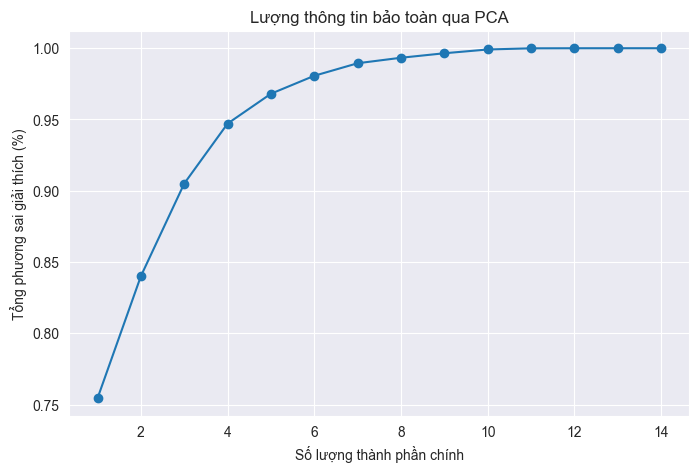

In [69]:
explained_var_ratio = pca_log.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var_ratio)

for i, var in enumerate(explained_var_ratio):
    print(f"PC{i+1}: {var*100:.2f}% | Tổng tích lũy: {cumulative_var[i]*100:.2f}%")

# Biểu đồ trực quan
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o')
plt.xlabel('Số lượng thành phần chính')
plt.ylabel('Tổng phương sai giải thích (%)')
plt.title('Lượng thông tin bảo toàn qua PCA')
plt.grid(True)
plt.show()

### 3. Thực hiện hiển thị trực quan đối với dữ liệu theo từng cặp 02 thành phần chính, áp dụng cho khoảng 4 – 6 thành phần chính.

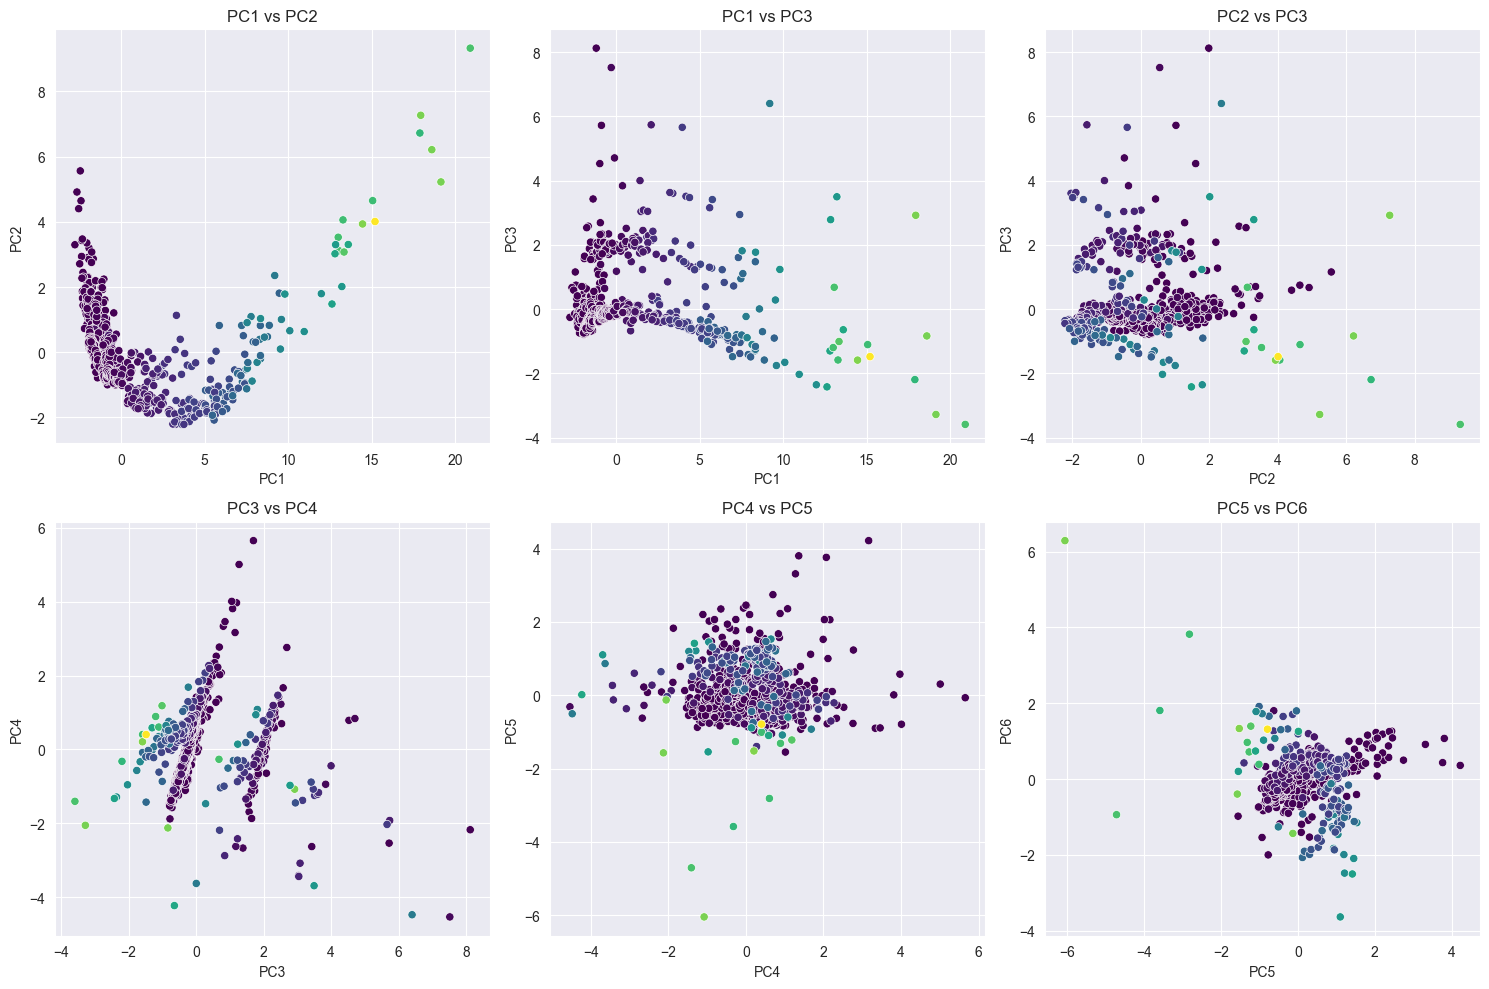

In [70]:
# Trực quan hóa theo cặp 2 thành phần chính (PCA dữ lệu gốc)

pca_n = PCA(n_components=6)
X_pca_n = pca_n.fit_transform(X_scaled)

plt.figure(figsize=(15,10))
pairs = [(0,1), (0,2), (1,2), (2,3), (3,4), (4,5)]

for i, (a,b) in enumerate(pairs[:6]):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x=X_pca_n[:,a], y=X_pca_n[:,b], hue=y, palette='viridis', legend=False)
    plt.xlabel(f'PC{a+1}')
    plt.ylabel(f'PC{b+1}')
    plt.title(f'PC{a+1} vs PC{b+1}')
plt.tight_layout()
plt.show()

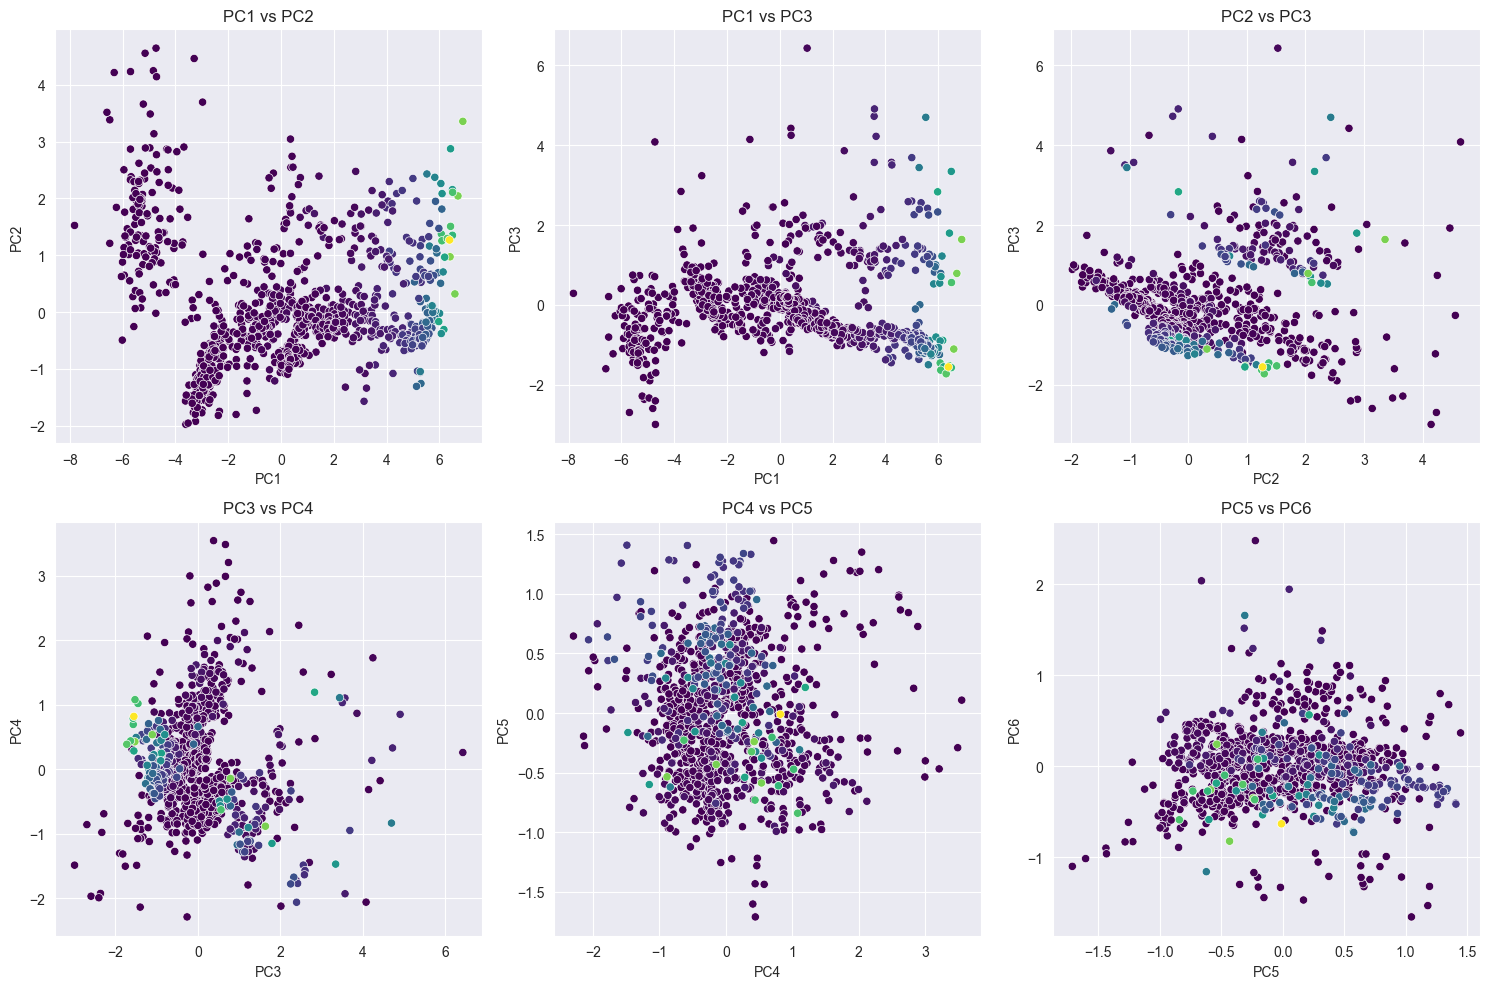

In [71]:
# Trực quan hóa theo cặp 2 thành phần chính (PCA dữ liệu biến đổi logarit)

pca_log_n = PCA(n_components=6)
X_log_pca_n = pca_n.fit_transform(X_log_scaled)

plt.figure(figsize=(15,10))
pairs = [(0,1), (0,2), (1,2), (2,3), (3,4), (4,5)]

for i, (a,b) in enumerate(pairs[:6]):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x=X_log_pca_n[:,a], y=X_log_pca_n[:,b], hue=y, palette='viridis', legend=False)
    plt.xlabel(f'PC{a+1}')
    plt.ylabel(f'PC{b+1}')
    plt.title(f'PC{a+1} vs PC{b+1}')
plt.tight_layout()
plt.show()

### 4. Thực hiện việc trực quan hóa mối quan hệ của một số chiều dữ liệu chính với đầu ra để xem xét khả năng có tương quan tuyến tính.

In [72]:
# Tương quan giữa các PC và đầu ra

pca_df = pd.DataFrame(X_pca_n, columns=[f'PC{i+1}' for i in range(6)])
pca_df[target] = y.values

corr = pca_df.corr()[target].sort_values(ascending=False)
print("\n🔹 Hệ số tương quan giữa các PC và đầu ra:")
print(corr)


🔹 Hệ số tương quan giữa các PC và đầu ra:
Revenue_(USD)    1.000000
PC1              0.965917
PC2              0.151421
PC6              0.009325
PC5              0.005160
PC4             -0.034768
PC3             -0.059142
Name: Revenue_(USD), dtype: float64


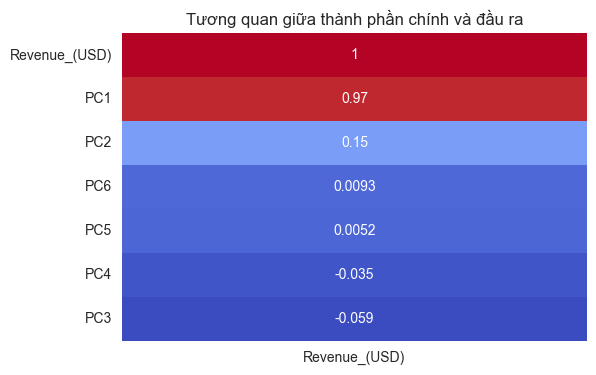

In [73]:
# Biểu đồ heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Tương quan giữa thành phần chính và đầu ra')
plt.show()